In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [8]:
# ===== 1. Load Dataset =====
df = pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df = df.drop(columns=['Id'])  # Remove ID column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Features and target
X = df.drop(columns=['Species'])
y = df['Species']

In [11]:
# ===== 2. Normalize Features =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Encode target for model and plotting
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [13]:
# ===== 3. Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

K=3 --> Accuracy: 1.0000


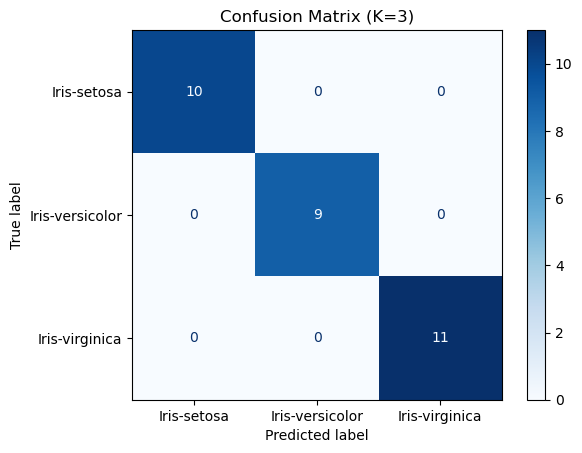

K=5 --> Accuracy: 1.0000


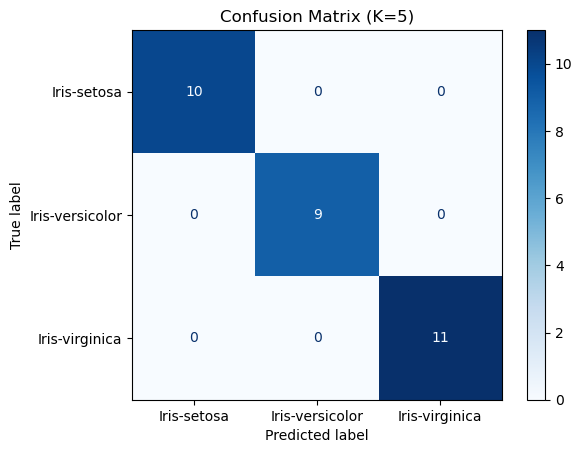

K=7 --> Accuracy: 1.0000


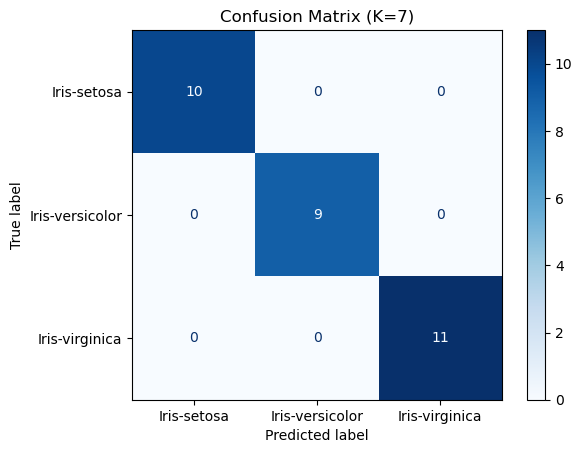

In [14]:
# ===== 4. Train KNN with different K values =====
k_values = [3, 5, 7]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"K={k} --> Accuracy: {acc:.4f}")
    
    cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix (K={k})")
    plt.show()


In [16]:
# ===== 5. Decision Boundary Plot (using first 2 features) =====
def plot_decision_boundary(X, y_numeric, class_names, k):
    X_plot = X[:, :2]  # Use first two features
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_plot, y_numeric)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_numeric, s=40, cmap=plt.cm.coolwarm)
    plt.xlabel("SepalLengthCm (scaled)")
    plt.ylabel("SepalWidthCm (scaled)")
    plt.title(f"Decision Boundary (K={k})")

    # Legend
    handles, _ = scatter.legend_elements()
    plt.legend(handles, class_names, title="Classes")
    plt.show()

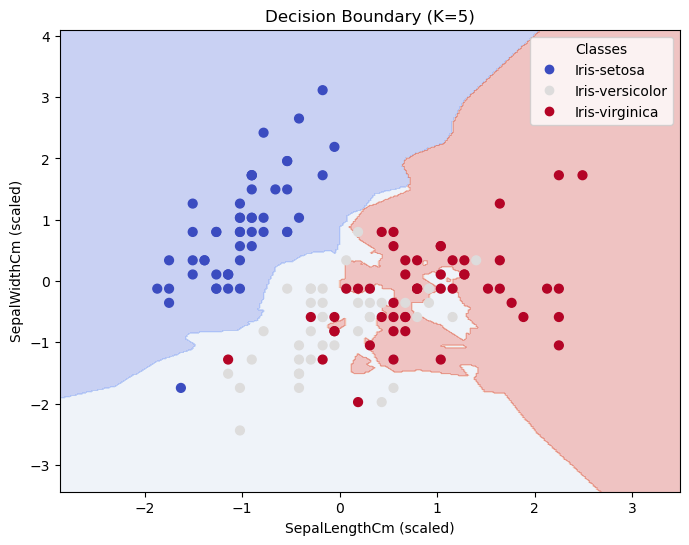

In [17]:
# Plot for K=5
plot_decision_boundary(X_scaled, y_encoded, label_encoder.classes_, k=5)